In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import math
import pandas as pd
import sys
from sklearn.preprocessing import StandardScaler
import random

In [ ]:
'''
Tout premier test de filtre MLP sur un exemple très simple.
'''

In [2]:
test=np.array([0,1,2])
print(test[-1])

2


In [23]:
x = np.linspace(0,49,50)
h = np.array([1,4,6,1])
y = np.convolve(x,h,mode='same')
print(x)
print(h)
print(y)
#y=y[:-(len(h))+1]
#print(y)
y+=np.random.normal(0,1,y.shape[0])
#print(y)


def decal(x,h):
    '''
    Va associer à chaque tuple de h.shape entrées sa sortie
    Doit prendre en compte le décalage dû à l'absence des retards
    '''
    #x_c=np.copy(x)
    #y_c=np.copy(y)
    hlen=len(h)
    xlen=len(x)

    #Liste des y sans les trucs en trop
    #y_d=y_d[:-(len(h))+1]
    #Rendu inutile avec mode='same' dans np.convolve

    #Liste des x rassemblés en len(h)
    i=0
    x_d=np.array([])
    for i in range(xlen):
        x_temp=np.array([])
        for j in range(i,hlen+i):
            if (j>(xlen-1)):
                x_array_value=[0]
                x_temp=np.append(x_temp,x_array_value)
            else:
                x_array_value=x[j]
                x_temp=np.append(x_temp,x_array_value)
        x_d=np.append(x_d,x_temp)
    return(np.reshape(x_d,(-1,hlen)))

x_final = decal(x,h)
x_final = np.array(x_final)
print(x_final)

scaler = StandardScaler()
x_final = scaler.fit_transform(x_final)
print(x_final)

y = y.reshape(-1,1)
print(y)
scaler = StandardScaler()
y = scaler.fit_transform(y)
print(y)

'''
plt.plot(
plt.grid()
plt.show()
'''


[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49.]
[1 4 6 1]
[  1.   6.  17.  29.  41.  53.  65.  77.  89. 101. 113. 125. 137. 149.
 161. 173. 185. 197. 209. 221. 233. 245. 257. 269. 281. 293. 305. 317.
 329. 341. 353. 365. 377. 389. 401. 413. 425. 437. 449. 461. 473. 485.
 497. 509. 521. 533. 545. 557. 569. 531.]
[[ 0.  1.  2.  3.]
 [ 1.  2.  3.  4.]
 [ 2.  3.  4.  5.]
 [ 3.  4.  5.  6.]
 [ 4.  5.  6.  7.]
 [ 5.  6.  7.  8.]
 [ 6.  7.  8.  9.]
 [ 7.  8.  9. 10.]
 [ 8.  9. 10. 11.]
 [ 9. 10. 11. 12.]
 [10. 11. 12. 13.]
 [11. 12. 13. 14.]
 [12. 13. 14. 15.]
 [13. 14. 15. 16.]
 [14. 15. 16. 17.]
 [15. 16. 17. 18.]
 [16. 17. 18. 19.]
 [17. 18. 19. 20.]
 [18. 19. 20. 21.]
 [19. 20. 21. 22.]
 [20. 21. 22. 23.]
 [21. 22. 23. 24.]
 [22. 23. 24. 25.]
 [23. 24. 25. 26.]
 [24. 25. 26. 27.]
 [25. 26. 27. 28.]
 [26. 27. 28. 29.]
 [27. 28. 29. 30.]

'\nplt.plot(\nplt.grid()\nplt.show()\n'

In [24]:
model = tf.keras.Sequential()

'''
model.add(tf.keras.layers.Dense(1, "linear", input_shape=[1]))
model.add(tf.keras.layers.Dense(256, "sigmoid"))
model.add(tf.keras.layers.Dense(64, "sigmoid"))
model.add(tf.keras.layers.Dense(64, "sigmoid"))
model.add(tf.keras.layers.Dense(256, "sigmoid"))
model.add(tf.keras.layers.Dense(1, "linear"))
'''

model.add(tf.keras.layers.Dense(4, "linear", input_shape=[4]))
model.add(tf.keras.layers.Dense(256, "sigmoid"))
model.add(tf.keras.layers.Dense(1, "linear"))


model.compile(loss="mse", optimizer="adam")

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_4 (Dense)              (None, 256)               1280      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 1,557
Trainable params: 1,557
Non-trainable params: 0
_________________________________________________________________


In [25]:
#data_x = decal(x,h)
#data_x = np.reshape(data_x,-1)

#print(data_x)

model.fit(x_final,y,epochs=100,verbose=1)

Epoch 1/100
2/2 [==============================] - 1s 4ms/step - loss: 2.4995
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 1.8769
Epoch 3/100
2/2 [==============================] - 0s 0s/step - loss: 1.3752
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 1.0506
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 0.8591
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 0.7566
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 0.7194
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 0.7225
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 0.7251
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 0.6872
Epoch 11/100
2/2 [==============================] - 0s 4ms/step - loss: 0.6269
Epoch 12/100
2/2 [==============================] - 0s 8ms/step - loss: 0.5426
Epoch 13/100
2/2 [==============================] - 0s 4ms/ste

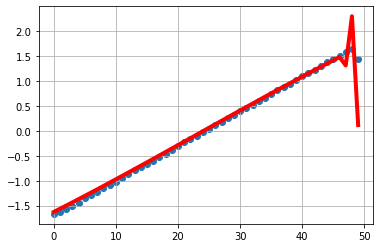

In [28]:
y_predicted = model.predict(x_final)

plt.scatter(x[::1], y[::1])
plt.plot(x, y_predicted, 'r', linewidth=4)
plt.grid()
plt.show()

In [94]:
'''
a=np.append(a,[0,1,2],axis=1)
a=np.append(a,[3,4,5],axis=1)
print(a)
'''

a=np.array([])
a=np.append([0,1,2],a)
a=np.append([3,4,5],a)
print(a)
a=np.reshape(a,(-1,3))
print(a)

[3. 4. 5. 0. 1. 2.]
[[3. 4. 5.]
 [0. 1. 2.]]
